In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import accuracy_score,r2_score,confusion_matrix,classification_report,recall_score,confusion_matrix,mean_squared_error,precision_score,recall_score,fbeta_score,f1_score,roc_curve,roc_auc_score
from sklearn.linear_model import LogisticRegression,LinearRegression,SGDClassifier
from sklearn.model_selection import train_test_split,KFold,cross_val_score,ShuffleSplit,cross_val_predict
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn import preprocessing
import re
import matplotlib as mpl
from pandas_profiling import ProfileReport
pd.set_option("display.precision", 6)
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification, fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.svm import SVC

## This dataset is very famous so, it is built in sklearn.datasets

In [2]:
df = fetch_openml('mnist_784',version=1)
df.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

DESC --> for Describtion <br>
data --> is an array with one row per instance and one column per feature<br>
target --> labels<br>

In [3]:
X = df['data'].values
y = df['target'].values
print(X.shape,y.shape)

(70000, 784) (70000,)


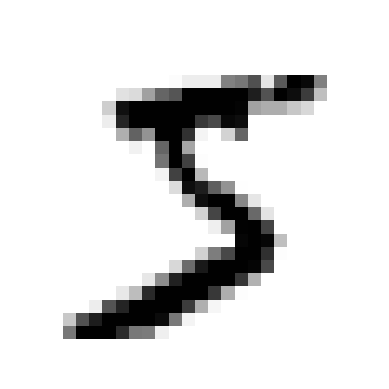

In [4]:
# we are using the reshaping to be as an image (28 * 28) pixels
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
# imshow to show an image 
plt.imshow(some_digit_image, cmap=mpl.cm.binary,interpolation='nearest')
plt.axis("off")
plt.show()

In [5]:
y[0]

'5'

The labels are string so, we prefer it to be an integer

In [6]:
y = y.astype('int')
y.dtype

dtype('int32')

In [7]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Binary Classifier can distinguish between only 2 classes (to be or not to be ^_^)

In [8]:
# we use Stochastic Gradient Descent as it is capable of handling very large datasets
y_train_5 = (y_train == 5) 
# true for all number (5) images otherwise false
y_test_5 = (y_test == 5)
sgd_clf = SGDClassifier(random_state=100)
y_train_5 = y_train_5.reshape(-1,1)
y_test_5 = y_test_5.reshape(-1,1)
sgd_clf.fit(X_train,y_train_5)
# some digit is the number (5) that we declared it before and stored it in some_digit, and we know that it is true but we are testing the model only
if sgd_clf.predict([some_digit]) == True:
    print("The prediction is true")
else:
    print("the prediction is false")

The prediction is true


## Evaluating Model Using cross val score

In [9]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")
# all the accuracy we get is above 96%, and it is Great !

array([0.9645 , 0.96325, 0.9602 ])

In [10]:
# cross val predict return the prediction for each fold
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

## Evaluating Model Using Confusion Matrix

![confusion_matrix2](https://user-images.githubusercontent.com/96451039/197643209-0cb5b908-27f1-4ed4-b243-b913f84d08c3.png)

In [11]:
# we pass to it labels, and predicted
print(confusion_matrix(y_train_5,y_train_pred))

[[53878   701]
 [ 1540  3881]]


There are 53,878 classified as non-5-images and thats true (True negatives) while there are 701 non-5-images classified as 5 images (False positive) <br>
There are 1540 classified as non-5-images and thats False (False negatives) while there are 3881 5-images classified as 5 images (True positive) <br>

In [12]:
# To make no error we can make the prediction values equal to the labels, and that will give us no error but this will be an overfitting
y_train_perfect = y_train_5
print(confusion_matrix(y_train_5,y_train_perfect))

[[54579     0]
 [    0  5421]]


## Evaluating Model Using precision and recall

![1_pOtBHai4jFd-ujaNXPilRg](https://user-images.githubusercontent.com/96451039/197643279-aa51c911-e0d6-4703-bf7b-0183750029b2.png)


Precision --> rate of True predictions of positive instances in another words(Truely positive classified over all the positive classified) اللي اتصنف صح من كل اللي هو صنفه صح<br>
Recall --> rate of positive instances that correctly classified in another words(Truely positive classified over all the True)  اللي اتصنف صح من كل الصح<br> 

In [13]:
# we pass labels, and predicted
print(recall_score(y_train_5,y_train_pred))
print(precision_score(y_train_5,y_train_pred))

0.7159195720346799
0.8470100392841554


## Evaluating Model Using F1 Score

![download](https://user-images.githubusercontent.com/96451039/197643315-363abc0c-361c-44bb-bfa6-34993ea86256.png)


F1 score is the harmonic mean of recall and precision, the harmonic mean gives more weight to low values so, if and only if recall and precision are high, therefore, we will get a high f1 score

![What Is The Difference Between Harmonic Mean And Arithmetic Mean_ BYJU’S - Google Chrome 10_18_2022 9_22_39 AM (2)](https://user-images.githubusercontent.com/96451039/197643368-8db321cc-10b9-4711-b310-8f7bd9cb9e1d.png)


For that the Harmonic mean is always less than arithmetic mean except in case when the set of values are equal, and the Harmonic mean often close to the minimum of 2 numbers precision, and recall 

In [14]:
# we pass to it labels, then predictions
print(f1_score(y_train_5,y_train_pred))
print(accuracy_score(y_train_5,y_train_pred))

0.7759672098370489
0.96265


## The receiver operating characteristic (ROC), plots the true positive rate (another namefor recall) against the false positive rate (FPR).

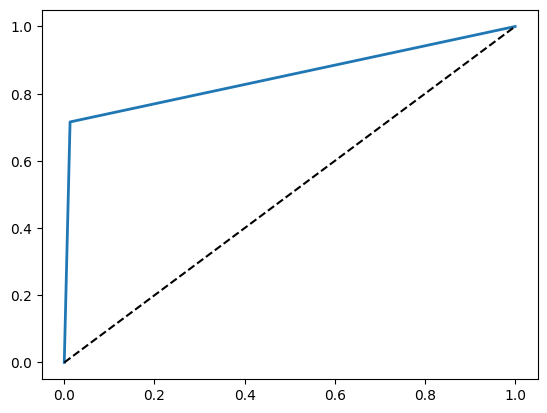

In [15]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
fpr, tpr,thresholds = roc_curve(y_train_5, y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') 
plot_roc_curve(fpr, tpr)
plt.show()

The accuracy score may be misleading sometimes so, we should use other metrics as we see in the previous cells

## precision and recall tradeoff
<h4>For any problem, we mainly have to focus on either of the class or both. In our example, the aim of the model should have high recall means should have a lower number of false negatives. So if we say the model predicted that a person is not having heart illness, then he should not have heart illness.<br>


If your main focus is to detect a person having heart illness, your model should have high precision, which means you have to lower the False Positive.

Unfortunately, you can’t have both precision and recall high. If you increase precision, it will reduce recall and vice versa. This is called the precision/recall tradeoff.   <h4>

## Now we have seen the binary classification that classifies between 2 classes only, now lets see the multiclassification that classifies more than 2 classes

Some algorithms (such as SGD classifiers, Random Forest classifiers, and naive Bayes
classifiers) are capable of handling multiple classes natively.<br> Others (such as Logistic
Regression or Support Vector Machine classifiers) are strictly binary classifiers.<br> However,
there are various strategies that you can use to perform multiclass classification
with multiple binary classifiers.

One way to create a system that can classify the digit images into 10 classes (from 0 to
9) is to train 10 binary classifiers, one for each digit (a 0-detector, a 1-detector, a 2-
detector, and so on). Then when you want to classify an image, you get the decision
score from each classifier for that image and you select the class whose classifier outputs
the highest score. This is called the one-versus-the-rest (OvR) strategy (also called
one-versus-all).
Another strategy is to train a binary classifier for every pair of digits: one to distinguish
0s and 1s, another to distinguish 0s and 2s, another for 1s and 2s, and so on.
This is called the one-versus-one (OvO) strategy. If there are N classes, you need to
train N × (N – 1) / 2 classifiers. For the MNIST problem, this means training 45
binary classifiers! When you want to classify an image, you have to run the image
through all 45 classifiers and see which class wins the most duels. The main advantage
of OvO is that each classifier only needs to be trained on the part of the training
set for the two classes that it must distinguish.

Scikit-Learn detects when you try to use a binary classification algorithm for a multiclass
classification task, and it automatically runs OvR or OvO, depending on the
algorithm. Let’s try this with a Support Vector Machine classifier using the sklearn.svm.SVC class:

In [16]:
clf = SVC()
clf.fit(X_train,y_train)
print(clf.predict([some_digit]))

[5]


here we will use decision function to return all scores of 10 classes instead of 1 so, we will see that it takes the highest score and spread it out

In [17]:
some_digit_scores = clf.decision_function([some_digit])
some_digit_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [18]:
clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## Multilabel Classification

It is like that you want to predict two labels or more, like if i want to know if the predicted value is odd or not, and bigger than 7 or not, so, an array will be returned containing 2 boolean values telling me if the label is odd or bigger than 7 or not 

In [19]:
y_train_large = (y_train > 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
y_multilabel

array([[False,  True],
       [False, False],
       [False, False],
       ...,
       [False,  True],
       [False, False],
       [ True, False]])

Then fitting data on the y_multilabel which is 2D array

In [20]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [21]:
# some_digit = 5 as we declared this before
print(knn_clf.predict([some_digit]))

[[False  True]]


False --> means that 5 is not larger than 7 <br>
True  --> means that 5 is an odd number

In [22]:
# this function get the f1 scores across all labels, and it assumes that all labels are equally important
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.9705516699095764

In [23]:
# Same as the previous function but it gives each label a weight according to its instances wtih target labels
f1_score(y_multilabel, y_train_knn_pred, average="weighted")

0.9756028197744341